In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

![title](img/warvsdread.png)

![title](img/warstats.png)
![title](img/dreadstats.png)

In [3]:
class MeleeWeapon:
    def __init__(self,name,S,AP,D):
        self.name = name
        self.S =S 
        self.AP =AP 
        self.D =D 

class Model:
    def __init__(self, name, WS, BS, S, T, W, A, SV, ISV):
        self.name = name
        self.WS = WS
        self.BS = BS
        self.S = S
        self.T = T
        self.W = W
        self.A = A
        self.SV = SV
        self.ISV = ISV
        self.Mweapon = MeleeWeapon("Power klaw",self.S*2,-3,2)
    def makeMeleeAtack(self,T,SV,ISV):
        attacks=np.random.randint(1,7,self.A)
        attacks_hited = np.count_nonzero(attacks>=self.WS)
        wounding_attacks = np.random.randint(1,7,attacks_hited)
        attacks_wound = (self.Mweapon.S>=2*T)*np.count_nonzero(wounding_attacks>=2)+(self.Mweapon.S>=T)*(self.Mweapon.S<2*T)*np.count_nonzero(wounding_attacks>=3)+(self.Mweapon.S==T)*np.count_nonzero(wounding_attacks==4)+(self.Mweapon.S<T)*(self.Mweapon.S>T/2)*np.count_nonzero(wounding_attacks>=5) +(self.Mweapon.S<=T/2)*6
        saving_rolls=np.random.randint(1,7,attacks_wound)
        unsaved_attacks=np.count_nonzero(saving_rolls<min((SV-self.Mweapon.AP),ISV))
        damage=unsaved_attacks*self.Mweapon.D
        results = {
            "attack_roll":attacks,
            "attacks_hitted":attacks_hited,
            "wound_rolls":wounding_attacks,
            "attacks_wounded":attacks_wound,
            "save_roll":saving_rolls,
            "unsaved_attacks":unsaved_attacks,
            "total_damage":damage


        }
        return results


In [4]:
warboss = Model("Warboss",2,5,6,6,6,5,4,5)
dreadnought = Model("Dreadnought",3,3,6,7,8,4,3,7)
n = 100000
simulation_hitted = np.array([])
simulation_wounded = np.array([])
simulation_unsaved = np.array([])
simulation_damage = np.array([])
for x in range(n):
    sim=(warboss.makeMeleeAtack(dreadnought.T,dreadnought.SV,dreadnought.ISV))
    simulation_hitted=np.append(simulation_hitted,sim["attacks_hitted"])
    simulation_wounded=np.append(simulation_wounded,sim["attacks_wounded"])
    simulation_unsaved=np.append(simulation_unsaved,sim["unsaved_attacks"])
    simulation_damage=np.append(simulation_damage,sim["total_damage"])


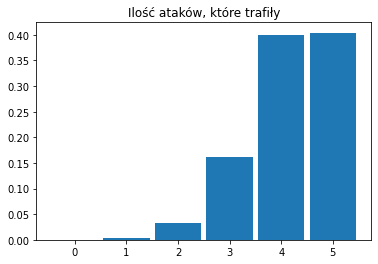

In [5]:
d = np.diff(np.unique(simulation_hitted)).min()
left_of_first_bin = 0 - float(d)/2
right_of_last_bin = simulation_hitted.max() + float(d)/2
plt.hist(simulation_hitted, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,rwidth=0.9)
plt.title("Ilość ataków, które trafiły")
plt.show()

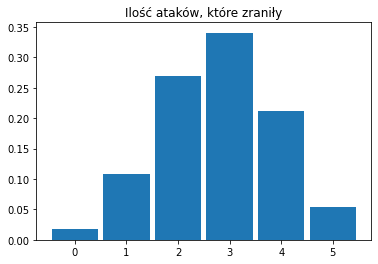

In [6]:
d = np.diff(np.unique(simulation_wounded)).min()
left_of_first_bin = 0 - float(d)/2
right_of_last_bin = simulation_wounded.max() + float(d)/2
plt.hist(simulation_wounded, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,rwidth=0.9)
plt.title("Ilość ataków, które zraniły")
plt.show()

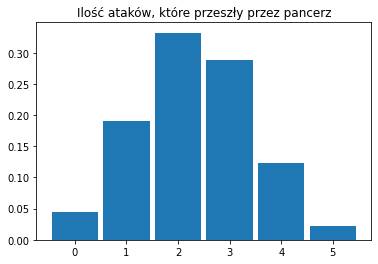

In [7]:
d = np.diff(np.unique(simulation_unsaved)).min()
left_of_first_bin = 0 - float(d)/2
right_of_last_bin = simulation_unsaved.max() + float(d)/2
plt.hist(simulation_unsaved, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,rwidth=0.9)
plt.title("Ilość ataków, które przeszły przez pancerz")
plt.show()

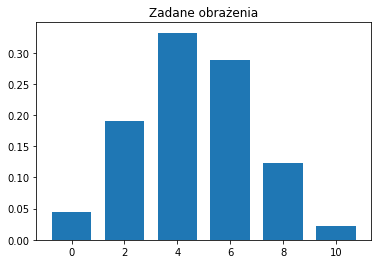

In [8]:

labels, counts = np.unique(simulation_damage, return_counts=True)
counts=counts/len(simulation_damage)
plt.bar(labels, counts, align='center',width=1.5)
plt.gca().set_xticks(labels)
plt.title("Zadane obrażenia")
plt.show()
